The CRISP-DM method will be applied here to keep track of the analysis process.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

## 1. Business Understanding
Being a football fan and local famous striker means exploring FIFA19 player datsset could be so much fun. 

I will focus on the three question below:

Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most economical ？

Q2: What's the age distribution like? How is it related to player's overall rating?

Q3: How is a player's skils set influence his potential? Can we predict a player's potential based on his skills' set?


## 2. Data Understanding

In [2]:
# load dataset
fifa19_player_df = pd.read_csv('data.csv')
fifa19_player_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# num of players
fifa19_player_df.shape[0]

18207

In [4]:
# data format for each column
fifa19_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [5]:
# What kind information is provied?
fifa19_player_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [6]:
# missing values
fifa19_player_df.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

## 3. Prepare Data
There are some necessary stpes to apply before continue exploring the dataset:

* Drop unused columns

* Convert string values to number 

* Handle missing values, drop them if necessary

In [7]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

fifa19_player_df.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
fifa19_player_df.head()
fifa19_player_df['Release Clause']

0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
5        €172.1M
6        €137.4M
7          €164M
8        €104.6M
9        €144.5M
10       €127.1M
11       €156.8M
12        €90.2M
13         €111M
14       €121.3M
15       €153.5M
16       €160.7M
17       €165.8M
18       €123.3M
19       €113.7M
20       €105.6M
21         €111M
22        €62.7M
23       €119.3M
24        €44.6M
25       €166.1M
26       €137.3M
27       €126.4M
28           NaN
29       €105.4M
          ...   
18177      €193K
18178       €94K
18179      €119K
18180       €78K
18181      €109K
18182      €101K
18183        NaN
18184       €78K
18185       €88K
18186      €167K
18187       €66K
18188      €143K
18189      €125K
18190      €165K
18191      €119K
18192      €119K
18193       €99K
18194      €109K
18195      €153K
18196      €113K
18197       €88K
18198      €165K
18199      €175K
18200      €143K
18201      €153K
18202      €143K
18203      €113K
18204      €16

In [9]:
# Convert value/wage string to number
# Example: €110.5M -> 110.5 * 1000000
def str2number(amount):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [10]:
# Convert value, wage to number
# First convert value, wage string to actual amount, then divide by 1 million and 1 k. 

fifa19_player_df["Release Clause"]=fifa19_player_df["Release Clause"][1]
fifa19_player_df['Value_M'] = fifa19_player_df["Release Clause"].apply(lambda x: str2number(x) / 1000000)


In [11]:
# From below we can see that highest player value is 118.8m and wage is 565k
# Which are Neymar Jr and L. Messi respectively.
fifa19_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,1.820700e+04
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,1.271000e+02
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,4.347220e-11
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.271000e+02
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.271000e+02
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.271000e+02
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.271000e+02
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,1.271000e+02


In [12]:
# Missing value handling
missing_player_df = fifa19_player_df[fifa19_player_df['Agility'].isnull()]

In [13]:
missing_player_df.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.800000e+01
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.616743e-14
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.271000e+02



 We can see that quite a few columns which are related to players' skills got 48 missing values. 
 
 So there were 48 players that simply missing these values. 
 
 But we will reserve those players for Q1 and Q2 since there were no missing value in Value_M and Wage_K column.
 
 For Q3, we will drop those player rows since there were just too many missing values here.

### 4. Answer Questions base on dataset


#### Q1: What's the ratio of total wages/ total potential for clubs. Which clubs are the most economical ？

In [14]:
club_wages = fifa19_player_df.groupby('Club').sum()

In [15]:
club_player_count = fifa19_player_df.groupby('Club').count()

In [16]:
# Number of clubs and average number of players in each club
print('Number of clubs is {}'.format(club_player_count.shape[0]))
print('Average number players in each club is {}'.format(round(club_player_count['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'
      .format(round(club_wages['Wage_K'].sum() / club_wages['Potential'].sum(), 2)))

Number of clubs is 651
Average number players in each club is 27.6


KeyError: 'Wage_K'

In [17]:
club_wages['Wage/Potential'] = club_wages['Wage_K'] / club_wages['Potential']
club_wages['Player Number'] = club_player_count['Age']
club_wages['Player Average Age'] = club_wages['Age'] / club_wages['Player Number']

KeyError: 'Wage_K'

In [18]:
club_wages.sort_values('Wage/Potential', ascending=False, inplace=True)

KeyError: 'Wage/Potential'

In [19]:
club_wages.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M
Club,,,,,,,,,,,,,,,,,,,,,
SSV Jahn Regensburg,744,1902,2010,44680,29.0,90.0,65.0,1368.0,1261.0,1605.0,...,1635.0,1431.0,1310.0,1246.0,463.0,469.0,427.0,467.0,470.0,3685.9
1. FC Heidenheim 1846,672,1841,2014,43784,28.0,83.0,65.0,1385.0,1274.0,1397.0,...,1575.0,1235.0,1307.0,1241.0,486.0,471.0,418.0,477.0,452.0,3558.8
1. FC Kaiserslautern,620,1648,1817,39631,26.0,82.0,58.0,1250.0,1082.0,1322.0,...,1374.0,1100.0,1150.0,1145.0,416.0,399.0,388.0,395.0,391.0,3304.6
1. FC Köln,681,1982,2144,46807,37.0,85.0,68.0,1466.0,1291.0,1518.0,...,1731.0,1474.0,1471.0,1378.0,521.0,494.0,541.0,500.0,503.0,3558.8
1. FC Magdeburg,642,1706,1829,39850,27.0,86.0,55.0,1209.0,1166.0,1320.0,...,1371.0,1215.0,1207.0,1167.0,406.0,430.0,408.0,406.0,448.0,3304.6


In [20]:
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Orange')
plt.title('Top 10 clubs spending wage(K) on players potential')

KeyError: 'Wage/Potential'

In [21]:
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 economical clubs ')

KeyError: 'Wage/Potential'

From the result and plot, it's obvious that the 'Giant' clubs  including Real Madrid, Bacelona, and clubs from EPL are willing to spend much more wage for high potential players than average clubs. This is how they stay competitive in leagues. 

But surprisingly, the economical clubs are not clubs from nowhere that we never heard of. Some of them are even quite famous like AEK Athens, Dynamo Kyiv. This suggests that those clubs' players are potiential but underpayed.  It maybe a good approach for 'Giant' clubs to import more econimical players from them to reduce their overall wage spent.

#### Q2: What's the age distribution like? How is it related to player's overall rating?

In [22]:
# Calculate age count
age_count = fifa19_player_df['Age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [23]:
# Calculate average overall rating
age_mean = fifa19_player_df.groupby('Age').mean()

In [24]:
# Plot age distribution and overall rating together
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

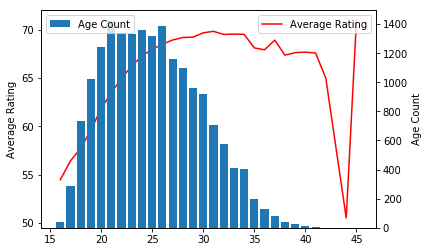

In [25]:
ages = age_count.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

From above plot, we can see that most players are between 20-26 years old. And players' number start to decrease after 26 years old and speed up after 30. Reason behind this could be that many young player didn't get enough opportunities to prove themselves and give up their dream as a football player. 

When a football player reaches their late 20s, they have gain enough experience and reaches peak of their rating. The golden era of a football player starts here and ends when his age reaches 35. At this age, his physical body condition drops quickly so as average rating. 

There are also quite a few numbers of players with age over 37, 38 years old. This is quite a surprise especially their rating still can remain quite high. 

### Continue Preparing Data for Q3

In [26]:
# Drop unused columns for Q3
columns_to_drop_q3 = ['Name', 'Nationality', 'Club']
fifa19_player_df.drop(columns_to_drop_q3, axis=1, inplace=True)

In [27]:
# Drop the 48 players whose skill set is missing.
fifa19_player_df.dropna(axis=0, how='any', inplace=True)

In [28]:
# Work Rate is in the format of attack work rate/defence work rate
# so need to create two new columns here.
fifa19_player_df['Work Rate Attack'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_df['Work Rate Defence'] = fifa19_player_df['Work Rate'].map(lambda x: x.split('/')[1])
fifa19_player_df.drop('Work Rate', axis=1, inplace=True)

In [29]:
fifa19_player_df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Value_M,Work Rate Attack,Work Rate Defence
0,31,94,94,€110.5M,€565K,2202,5.0,4.0,4.0,RF,...,26.0,6.0,11.0,15.0,14.0,8.0,€127.1M,127.1,Medium,Medium
1,33,94,94,€77M,€405K,2228,5.0,4.0,5.0,ST,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,127.1,High,Low
2,26,92,93,€118.5M,€290K,2143,5.0,5.0,5.0,LW,...,33.0,9.0,9.0,15.0,15.0,11.0,€127.1M,127.1,High,Medium
3,27,91,93,€72M,€260K,1471,4.0,3.0,1.0,GK,...,13.0,90.0,85.0,87.0,88.0,94.0,€127.1M,127.1,Medium,Medium
4,27,91,92,€102M,€355K,2281,4.0,5.0,4.0,RCM,...,51.0,15.0,13.0,5.0,10.0,13.0,€127.1M,127.1,High,High


In [30]:
# One Hot Encoding for Position, Work Rate Attack, Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_df = pd.get_dummies(fifa19_player_df, columns=one_hot_columns, prefix = one_hot_columns)

In [31]:
fifa19_player_df.shape

(18147, 78)

## 5. Train model and Measure Performance

In [37]:
y = fifa19_player_df['Potential']
X = fifa19_player_df.drop(['Value_M', 'Potential', 'Overall'], axis=1)

try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

imputer = SimpleImputer(strategy="median")

imputer.fit(X['HeadingAccuracy'])


ValueError: Expected 2D array, got 1D array instead:
array=[70. 89. 62. ... 46. 39. 46.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [34]:
ForestRegressor = RandomForestRegressor(n_estimators=500)
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))


0.8708254475577349
4.936388880808081


In [35]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.266296
18,Reactions,0.200660
0,Age,0.179175
32,StandingTackle,0.067283
38,GKReflexes,0.025341
34,GKDiving,0.023244
1,Special,0.019095
7,HeadingAccuracy,0.016855
26,Interceptions,0.015229
31,Marking,0.014818


Ball control, reactions, and age are the main three features that decides a player's potential. 
This is same to our perception. 

Young players with excellent ball control and fast reactions tends to give us an outstanding performance in football match.

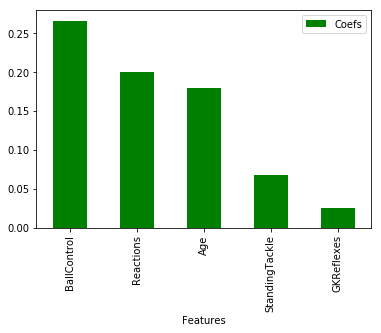

In [36]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='green')